# Import Libraries

In [2]:
import pandas as pd, numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly_express as px

sns.set_style("whitegrid") # set some seaborn styles
sns.set_style("ticks")

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_colwidth", 500)

# Import Data

In [3]:
df_raw = pd.read_csv("../data_raw/multiple_choice_responses_2019.csv", low_memory=False)

# 1. Review / cleaning 

In [4]:
df_raw["Q3"].value_counts()

India                                                   4786
United States of America                                3085
Other                                                   1054
Brazil                                                   728
Japan                                                    673
Russia                                                   626
China                                                    574
Germany                                                  531
United Kingdom of Great Britain and Northern Ireland     482
Canada                                                   450
Spain                                                    399
Nigeria                                                  395
France                                                   387
Taiwan                                                   301
Turkey                                                   288
Italy                                                    271
Australia               

In [5]:
# get overview, search isnull. 
100 * df_raw.isnull().sum() / len(df_raw)

Time from Start to Finish (seconds)     0.000000
Q1                                      0.000000
Q2                                      0.000000
Q2_OTHER_TEXT                           0.000000
Q3                                      0.000000
Q4                                      1.998174
Q5                                      3.093620
Q5_OTHER_TEXT                           0.000000
Q6                                     28.983670
Q7                                     30.905771
Q8                                     32.914089
Q9_Part_1                              69.104372
Q9_Part_2                              81.909930
Q9_Part_3                              74.733746
Q9_Part_4                              83.015519
Q9_Part_5                              81.204990
Q9_Part_6                              88.031240
Q9_Part_7                              97.301958
Q9_Part_8                              98.732123
Q9_OTHER_TEXT                           0.000000
Q10                 

As most cols are dummy vars we dont drop cols with hight perc isnull

In [6]:
df = df_raw.copy() 

In [7]:
# extract question
questions = df.iloc[0,:]
questions


Time from Start to Finish (seconds)                                                                                                                                                                                                                           Duration (in seconds)
Q1                                                                                                                                                                                                                                                      What is your age (# years)?
Q2                                                                                                                                                                                                                                           What is your gender? - Selected Choice
Q2_OTHER_TEXT                                                                                                                                                               

In [8]:
# drop questions
df = df.drop(df.index[0])

In [9]:
# check and drop duplicates
df = df.drop_duplicates()

In [10]:
# drop columns
## possible to drop later: Q16, Q17, Q20, Q30, Q31, Q32

drop_all = ["Q26", "Time from Start to Finish", "Q11", "Q19"]
#df[df.columns.drop(list(df.filter(regex="Q26", "OTHER", "Time from Start to Finish (seconds)", "Q11", "Q19")))]

for col in drop_all:
    df = df.loc[:,~df.columns.str.contains(col)]
    

In [11]:
# rename cols
rename = {"Q1" : "age",
          "Q2" : "gender",
          "Q3" : "country",
          "Q4" : "degree",
          "Q5" : "position",
          "Q6" : "company_size",
          }
df = df.rename(columns=rename)

# 2. Extract subsets
for further steps we extract the relevant countries

In [12]:
india = df[df["country"] == "India"]

In [13]:
usa = df[df["country"] == "United States of America"]

## 2.1 some plotting

In [14]:
df_tmp = df.copy()
df_tmp["country"] = np.where(df["country"] != np.nan, "global", df["country"])

In [15]:
def perc(df, col):
    
    return round(100 * df[col].value_counts(normalize=True),2).to_frame()

In [16]:
# global_gender_dist = round(100 * df["gender"].value_counts(normalize=True),2).to_frame().rename(columns={"gender" : "global"})
# india_gender_dist = round(100 * india["gender"].value_counts(normalize=True),2).to_frame().rename
# usa_gender_dist = round(100 * usa["gender"].value_counts(normalize=True),2).to_frame()
# global_gender_dist

In [17]:
global_gender_dist = perc(df, "gender").rename(columns={"gender" : "global"})
india_gender_dist = perc(india, "gender").rename(columns={"gender" : "india"})
usa_gender_dist = perc(usa, "gender").rename(columns={"gender" : "usa"})

df_gender = global_gender_dist.merge(right=india_gender_dist, how="inner", left_index=True, right_index=True)
df_gender= df_gender.merge(right=usa_gender_dist, how="inner", left_index=True, right_index=True)

### 2.1.0 Fig Standards

In [18]:
figure_size = (12,6)

### 2.1.1 Gender

In [19]:
# Before we can execute our scripts, we need to connect the JavaScript to our notebook. Since Plotly plots are interactive, they make use of JavaScript behind the scenes. 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

map_data = dict(type='choropleth',
            locations=['IND'],
            locationmode='country names',
            colorscale='India',
            text=['India'],
            z=[1.0,2.0,3.0,4.0],
            colorbar=dict(title="USA States")
           )
map_layout = dict(geo = {'scope':'world'})
map_actual = go.Figure(data=[map_data], layout=map_layout)
iplot(map_actual)

px.choropleth(data_frame=df_gender,
            locations=['INDIA', 'USA'],
            locationmode='country names',
            color=df_gender.index
             )

In [20]:
#import 2018
df_raw_2018 = pd.read_csv("../data_raw/multipleChoiceResponses_2018.csv", low_memory=False)

In [21]:
#import 2017
df_raw_2017 = pd.read_csv("../data_raw/multipleChoiceResponses_2017.csv", engine='python')

In [22]:
#drop duplicates
df_raw_2017 = df_raw_2017.drop_duplicates()
# rename cols
rename_2017 = {"Age" : "age",
                "GenderSelect" : "gender",
                "Country" : "country",
                "FormalEducation" : "degree",
                "EmployerSize" : "company size",
                "LearningDataScienceTime" : "experience",
                "CompensationAmount" : "salary",
                "CompensationCurrency" : "currency",
                "ParentsEducation" : "Parents Education",
                "LanguageRecommendationSelect" : "LanguageRecommendation",
                }

#select columns
df_2017 = df_raw_2017[list(rename_2017.keys())]
#rename columns
df_2017 = df_2017.rename(columns=rename_2017)
#select countries
df_2017 = df_2017[(df_2017["country"] == "India") | (df_2017["country"] == "United States")]

In [23]:
# drop duplicates
df_raw_2018 = df_raw_2018.drop_duplicates()

# rename cols
rename_2018 = {"Q2" : "age",
                "Q1" : "gender",
                "Q3" : "country",
                "Q4" : "degree",
                "Q8" : "experience",
                "Q9" : "salary",
#               company size
                }
#select columns
df_2018 = df_raw_2018[list(rename_2018.keys())]
#rename
df_2018 = df_2018.rename(columns=rename_2018)
#select countries
df_2018 = df_2018[(df_2018["country"] == "India") | (df_2018["country"] == "United States of America")]

In [24]:
df_2017["degree"].value_counts().keys()

Index(['Master's degree', 'Bachelor's degree', 'Doctoral degree',
       'Some college/university study without earning a bachelor's degree',
       'Professional degree',
       'I did not complete any formal education past high school',
       'I prefer not to answer'],
      dtype='object')

In [25]:
df_2018["degree"].value_counts().keys()

Index(['Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school'],
      dtype='object')

In [26]:
df["degree"].value_counts().keys()

Index(['Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer',
       'No formal education past high school'],
      dtype='object')

In [27]:
replace_degree = {"Bachelor's degree" : "Bachelor’s degree",
                  "Master's degree" : "Master’s degree",
                  "Some college/university study without earning a bachelor's degree" : "Some college/university study without earning a bachelor’s degree",
                  "I did not complete any formal education past high school" : "No formal education past high school",
                 }

In [28]:
#get data 2017
degree_in = (df_2017[df_2017["country"]=="India"]["degree"]
           .value_counts(normalize=True)
           .to_frame()
           .rename(columns={"degree" : "2017"}))
degree_us = (df_2017[df_2017["country"]=="United States"]["degree"]
           .value_counts(normalize=True)
           .to_frame()
           .rename(columns={"degree" : "2017"}))

#uniform degrees 
replace_degree = {"Bachelor's degree" : "Bachelor’s degree",
                  "Master's degree" : "Master’s degree",
                  "Some college/university study without earning a bachelor's degree" : "Some college/university study without earning a bachelor’s degree",
                  "I did not complete any formal education past high school" : "No formal education past high school",
                 }
degree_in.rename(index=replace_degree, inplace=True)
degree_us.rename(index=replace_degree, inplace=True)

#get data 2018
degree_in = degree_in.assign(deg2018=df_2018[df_2018["country"]=="India"]["degree"]
                               .value_counts(normalize=True))
degree_in.rename(columns={"deg2018" : "2018"}, inplace=True)
degree_us = degree_us.assign(deg2018=df_2018[df_2018["country"]=="United States of America"]["degree"]
                               .value_counts(normalize=True))
degree_us.rename(columns={"deg2018" : "2018"}, inplace=True)

#get data 2019
degree_in = degree_in.assign(deg2019=df[df["country"]=="India"]["degree"]
                               .value_counts(normalize=True))
degree_in.rename(columns={"deg2019" : "2019"}, inplace=True)
degree_us = degree_us.assign(deg2019=df[df["country"]=="United States of America"]["degree"]
                               .value_counts(normalize=True))
degree_us.rename(columns={"deg2019" : "2019"}, inplace=True)

#rename values
rename_values = {"Some college/university study without earning a bachelor’s degree" : "Studied without earning a degree",
                "Bachelor’s degree" : "Bachelor",
                "Master’s degree" : "Master",
                "Professional degree" : "Professional",
                "Doctoral degree" : "Doctor",
                "No formal education past high school" : "No formal education",
                "I prefer not to answer" : "No answer"
                }
degree_us.rename(index=rename_values, inplace=True)
degree_in.rename(index=rename_values, inplace=True)

In [29]:
#reorder the index
index_degree = (['Bachelor', 'Master', 'Doctor', 'Professional', 'Studied without earning a degree', 'No formal education', 'No answer'])
degree_us = degree_us.reindex(index_degree)
degree_in = degree_in.reindex(index_degree)

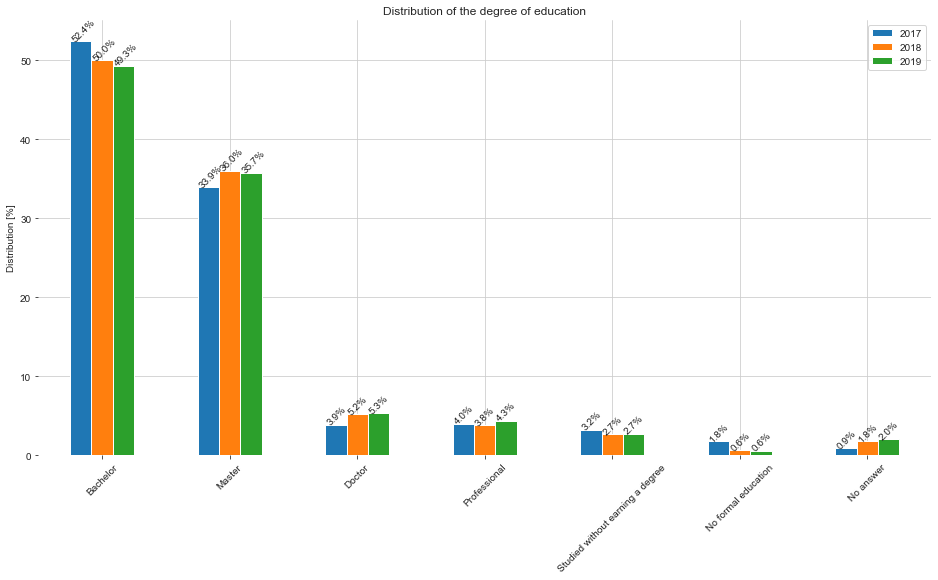

In [30]:
fig, ax = plt.subplots(figsize=(16,8))

plt.rcParams.update({'font.size': 10})
#plt.figure()
data = degree_in*100
data2 = degree_us*100
ax = data.plot(kind="bar", ax=ax, rot=45, grid=True)
for i in ax.patches:
    ax.text(i.get_x(),i.get_height(), str(round((i.get_height()), 1))+"%", rotation=45, fontsize = 10)

ax.set_title("Distribution of the degree of education")
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
plt.box(on=None)
ax.set_ylabel('Distribution [%]')
ax.get_yticks();
#ax.set_yticklabels(['{:,%}'.format(x) for x in vals]);
#degree_in.plot(kind="bar", ax=ax, rot=45);

array([ 0., 10., 20., 30., 40., 50., 60.])

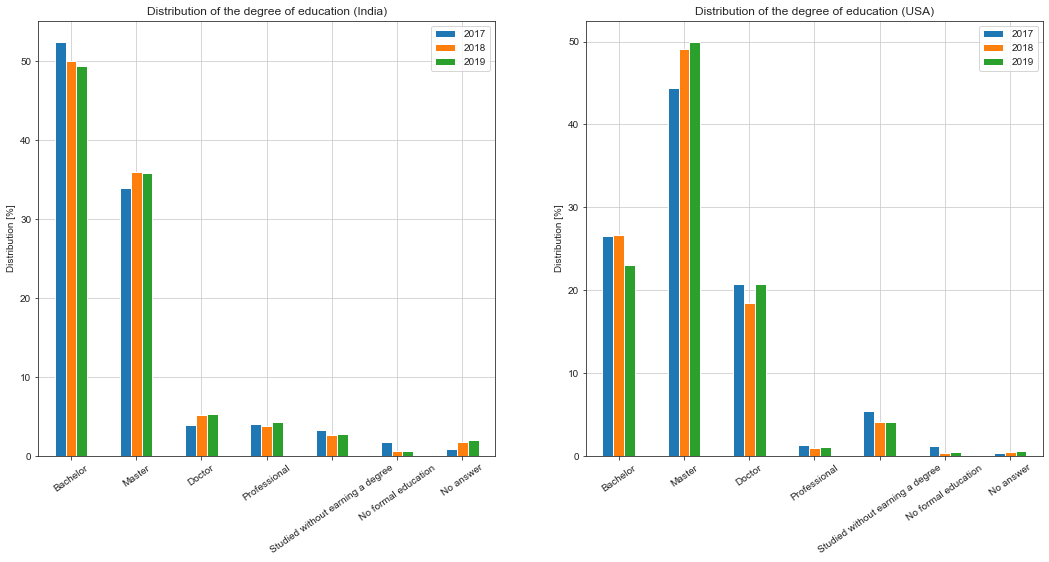

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))

plt.rcParams.update({'font.size': 10})

data1 = degree_in*100
data2 =data2 = degree_us*100
ax1 = data1.plot(kind="bar", ax=ax[0], rot=35, grid=True)
ax2 = data2.plot(kind="bar", ax=ax[1], rot=35, grid=True)

ax1.set_title("Distribution of the degree of education (India)")
ax2.set_title("Distribution of the degree of education (USA)")

ax1.set_ylabel('Distribution [%]')
ax2.set_ylabel('Distribution [%]')
ax1.get_yticks()

ax2.get_yticks()
#plt.box(on=None);


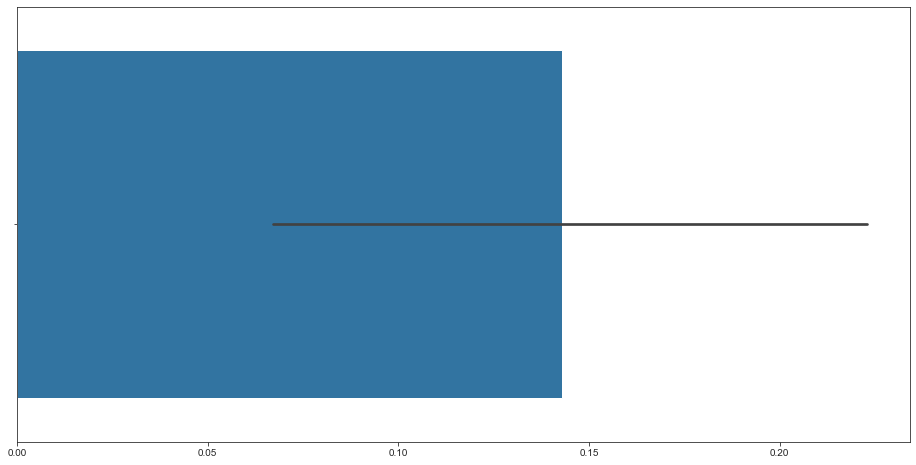

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=degree_in)
#degree_in.plot(kind="bar", ax=ax, rot=45, tick_label=12);

Text(0.5, 1.0, 'Gender distribution on ML survey')

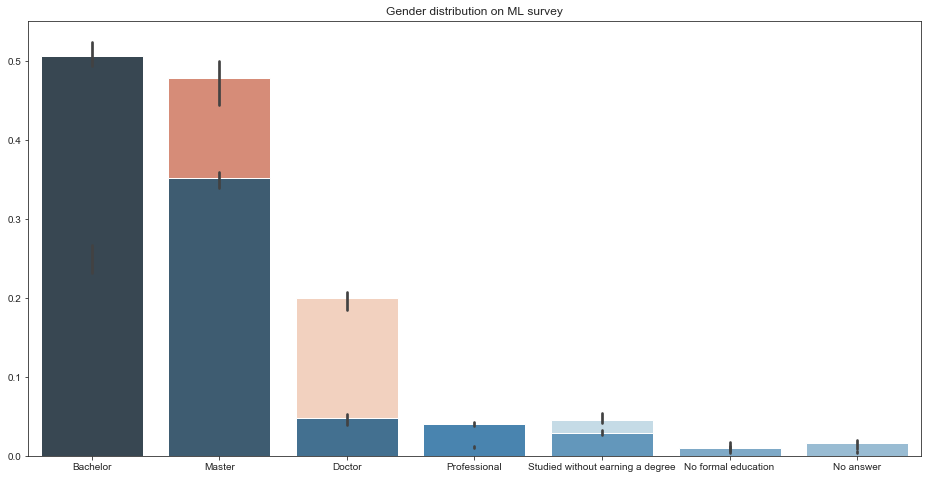

In [33]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=degree_us.T, ax=ax, palette="RdBu")
sns.barplot(data=degree_in.T, ax=ax, palette="Blues_d" ).set_title("Gender distribution on ML survey")#genders_us.plot(kind="line");

NameError: name 'genders' is not defined

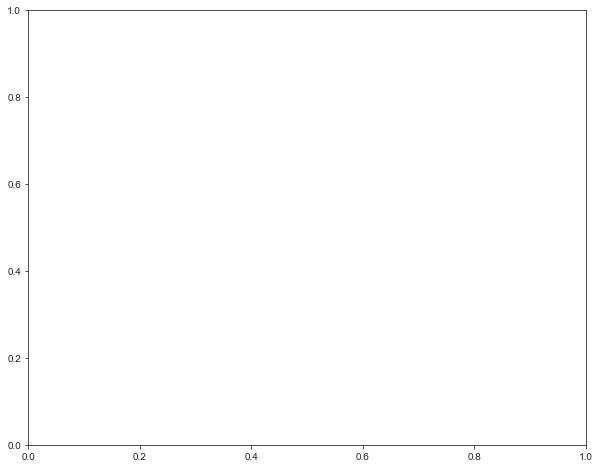

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x=genders.iloc[:,0], y=genders.iloc[0,:].values)

In [ ]:
genders = genders.T.copy()
fig, ax = plt.subplots(figsize=(10,8))
genders.iloc[:,0:2].plot(kind="line", ax=ax)
genders.iloc[:,2:4].plot(kind="line", ax=ax)
;

In [ ]:
map_data = dict(type='choropleth',
            locations=['INDIA', 'USA'],
            locationmode='country names',
            colorscale='Viridis',
            text=[],
            z=[81.84, 77.37],
            colorbar=dict(title="World Gender Distribution"),
)
map_layout = dict(geo = {'scope':'world'})
map_actual = go.Figure(data=[map_data], layout=map_layout)
iplot(map_actual)

In [ ]:
fig , ax = plt.subplots(figsize=figure_size)
sns.barplot(data=df_gender, x=["global", "india"]).set(xlabel="Gender");

### 2.1.2 Age

In [ ]:
sns.scatterplot(df, y="Q10")